In [ ]:
!pip install sklvq

## Menyiapkan dataset dan library yang diperlukan

In [ ]:
# Import Library Umum
import numpy as np
np.int = int
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

# Import Library Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Import Library Sklvq
from sklvq import GLVQ

In [ ]:
url = 'https://drive.google.com/uc?export=download&id=1_w1e_QEZBQdhdc0ZzKIldTEFCodFXAZm'
output = 'diabetes.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1_w1e_QEZBQdhdc0ZzKIldTEFCodFXAZm
To: /content/diabetes.csv
100%|██████████| 23.9k/23.9k [00:00<00:00, 32.3MB/s]


'diabetes.csv'

In [ ]:
# Membaca dataset
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
print(dataset.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [ ]:
# Lihat ukuran Dataset
print('Ukuran dataset:', dataset.shape)

Ukuran dataset: (768, 9)


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

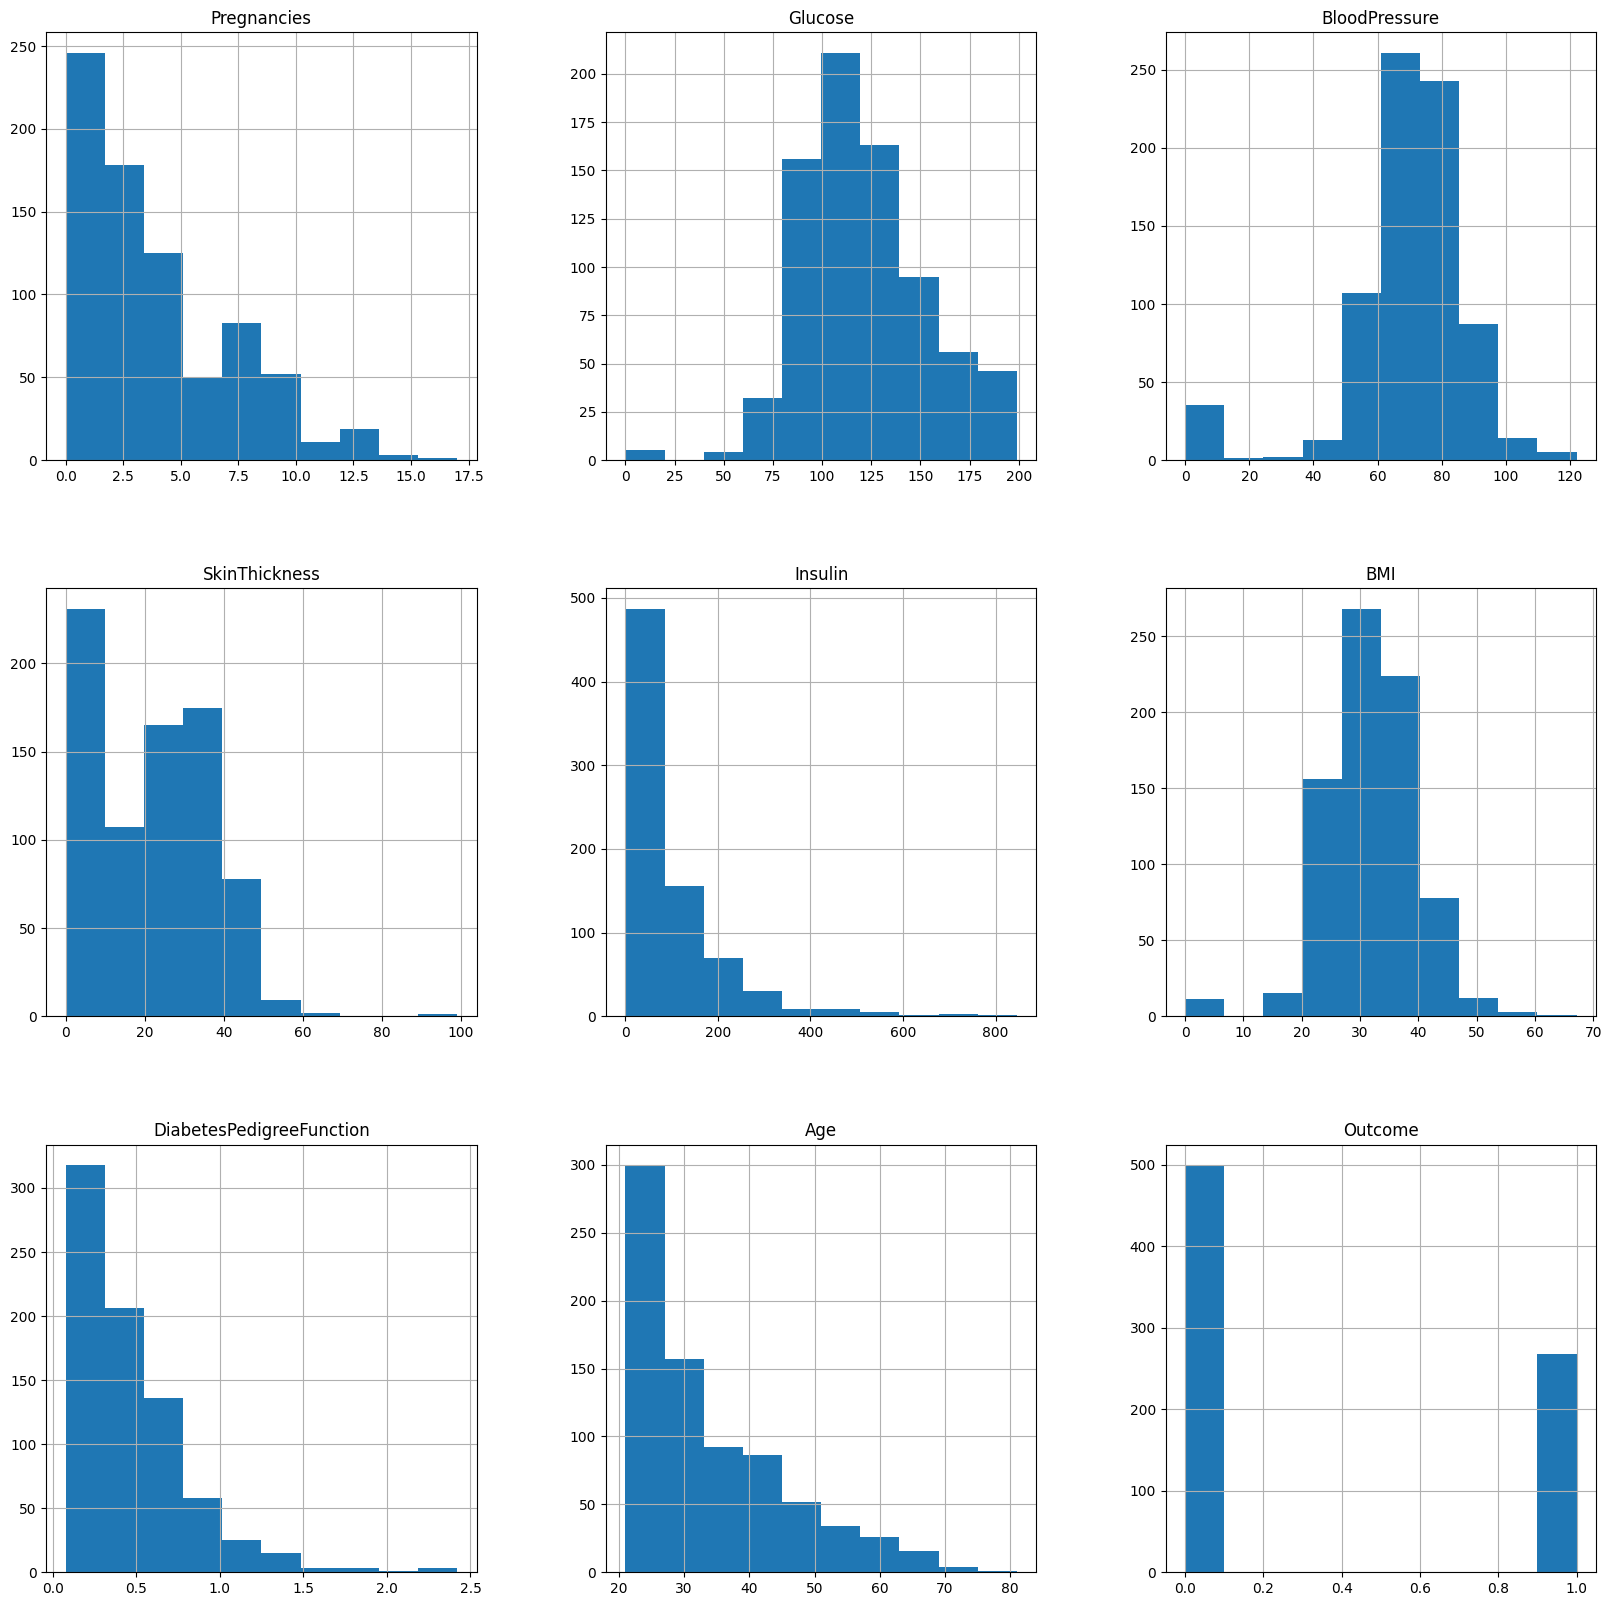

In [ ]:
dataset.hist(figsize=(20,20))

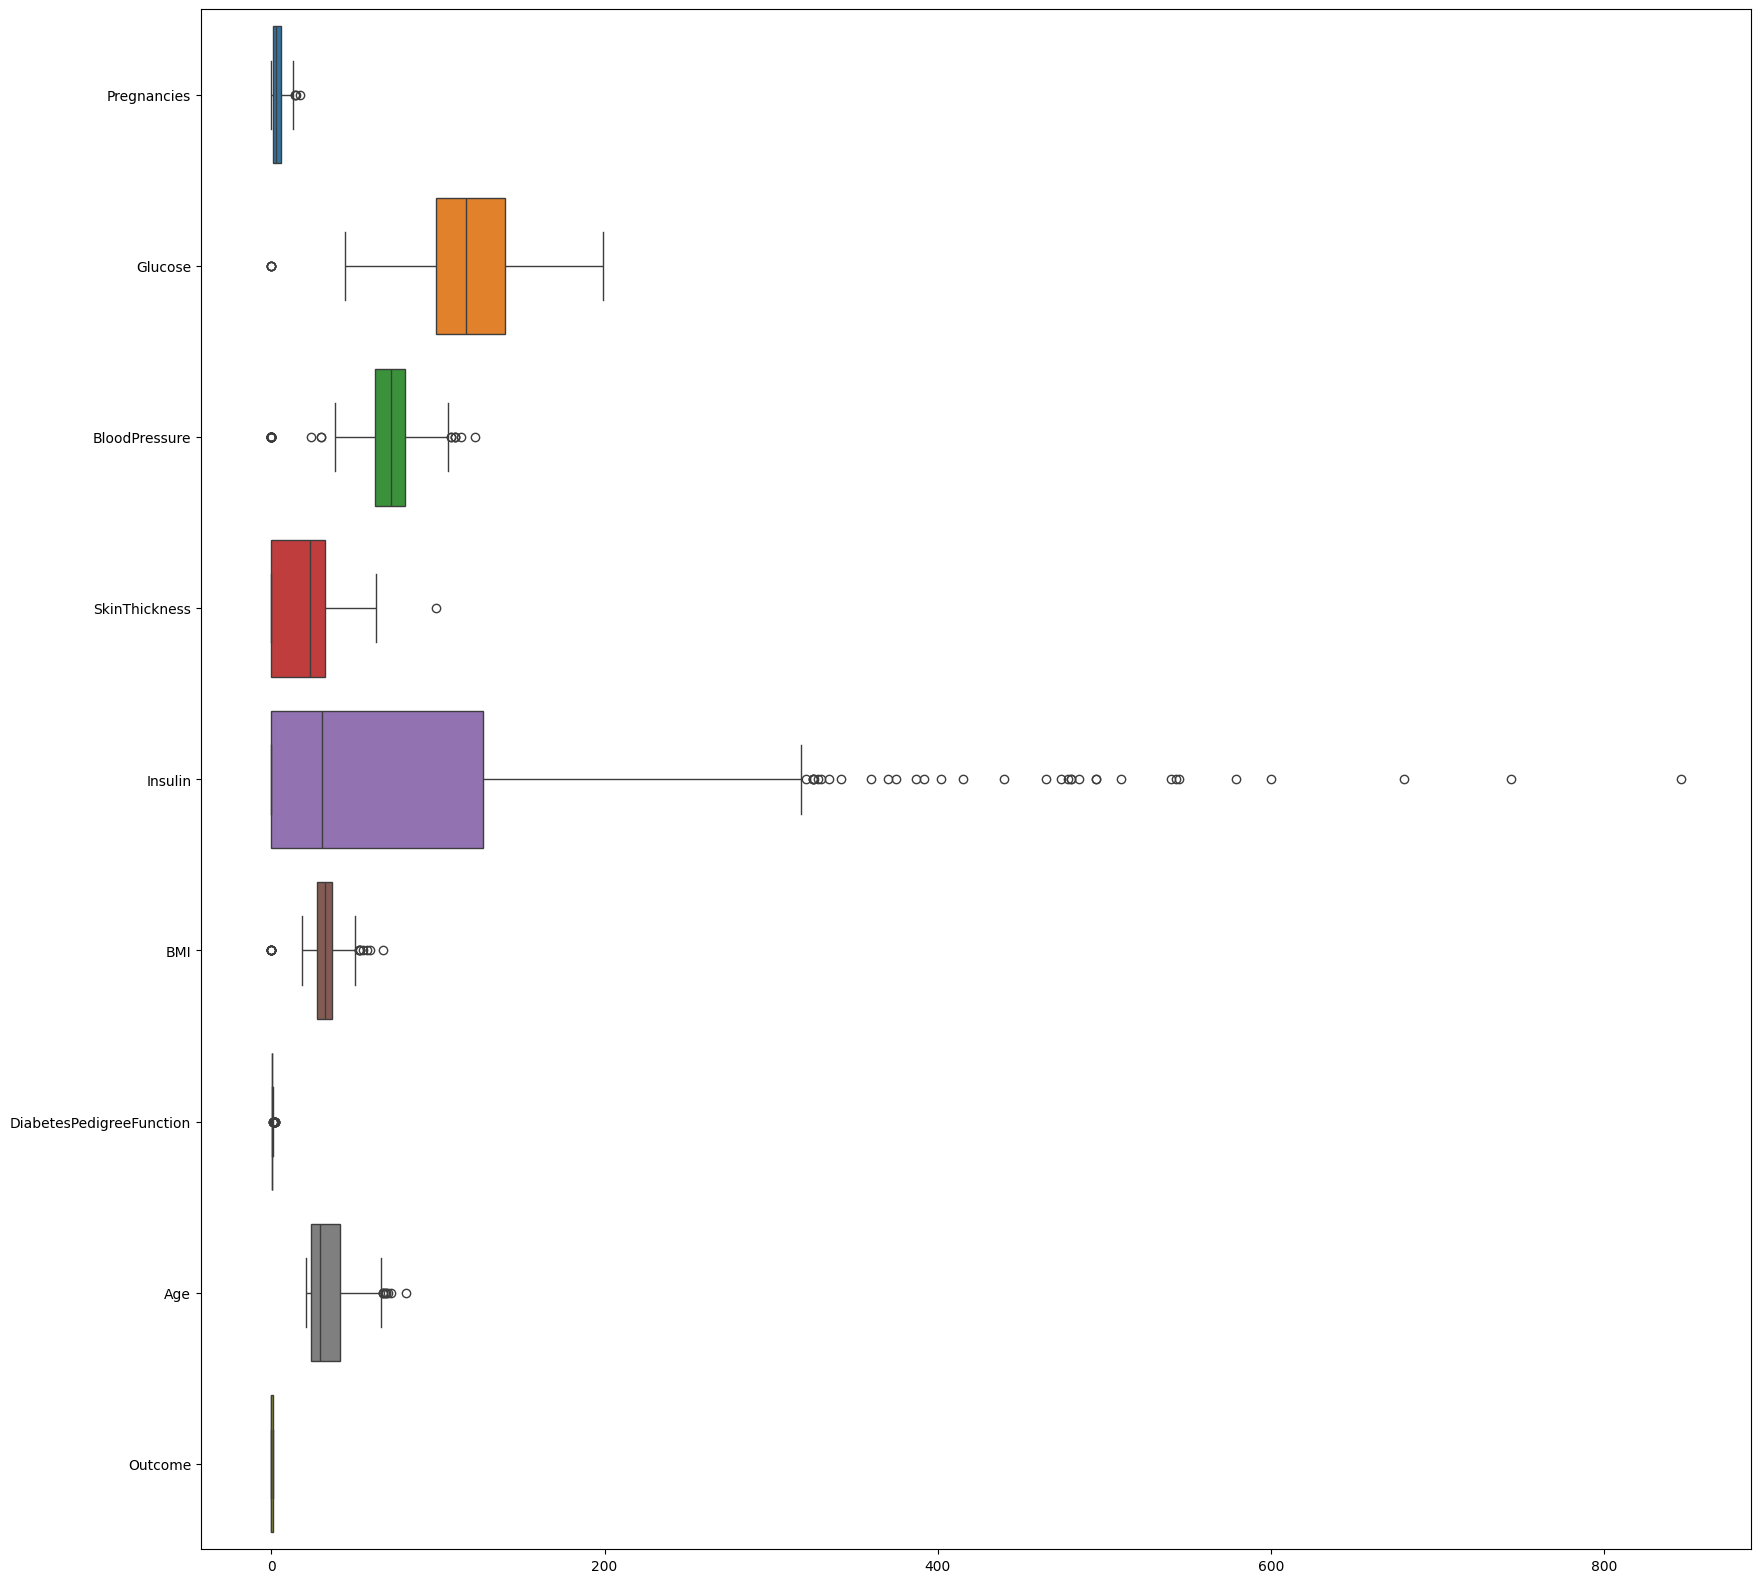

In [ ]:
plt.figure(figsize=(20,20))
sns.boxplot(data=dataset.select_dtypes(include=[int, float]), orient="h")
plt.show()

In [ ]:
# plt.figure(figsize=(20,20))
# sns.boxplot(data=dataset.select_dtypes(include=[int, float]), orient="h")
# plt.show()

### Atribute Correlation (Korelasi antar atribut / kolom / fitur)

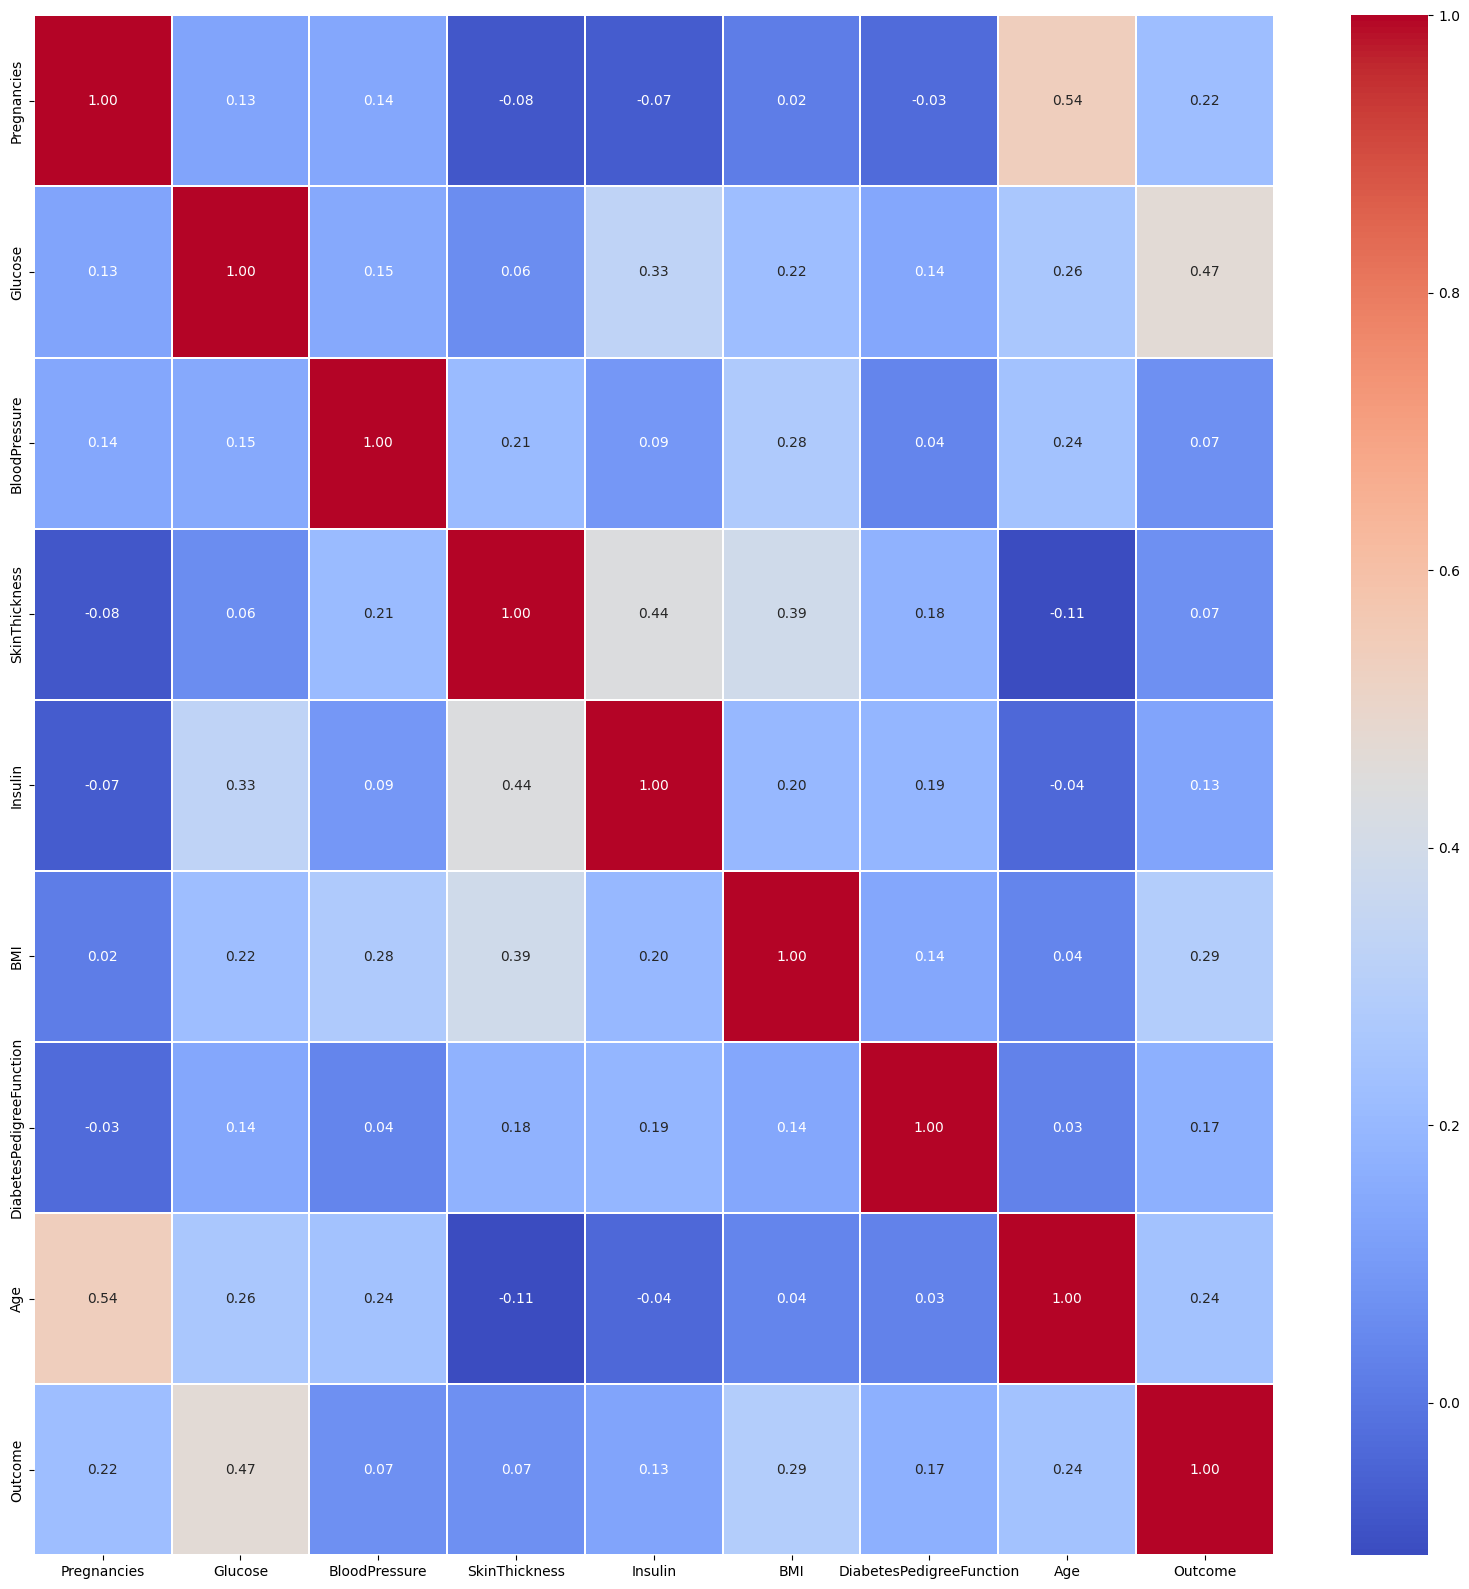

In [ ]:
# Uji korelasi atribut
f, ax = plt.subplots(figsize=(20, 20))
corr = dataset.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm", fmt='.2f', linewidths=.05)

## Preprocessing

### Cari missing value dan data yang terduplikasi

In [ ]:
print('The number of missing value on dataset:')
dataset.isna().sum()

The number of missing value on dataset:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Count Duped Data

In [ ]:
print('Is there any duplicated data?')
dataset.duplicated().sum()

Is there any duplicated data?


0

In [ ]:
data = dataset.iloc[:, :-1]
label = dataset['Outcome']

In [ ]:
# Normalisasi min max
scaler = MinMaxScaler()
result = scaler.fit_transform(data)
data = pd.DataFrame(data=result, columns=data.columns)

In [ ]:
# # Melakukan perbaikan outliers pada setiap kolom numerik
# for col in data.columns:
#     Q1 = data[col].quantile(0.25)  # Kuartil pertama (25%)
#     Q3 = data[col].quantile(0.75)  # Kuartil ketiga (75%)
#     IQR = Q3 - Q1  # Rentang interquartile (IQR)

#     # Menentukan batas atas dan batas bawah
#     lower_bound = Q1 - (1.5 * IQR)
#     upper_bound = Q3 + (1.5 * IQR)

#     # Mengganti nilai-nilai outliers dengan batas atas/bawah
#     data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,0.204015
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,0.196004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,0.050000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,0.133333
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


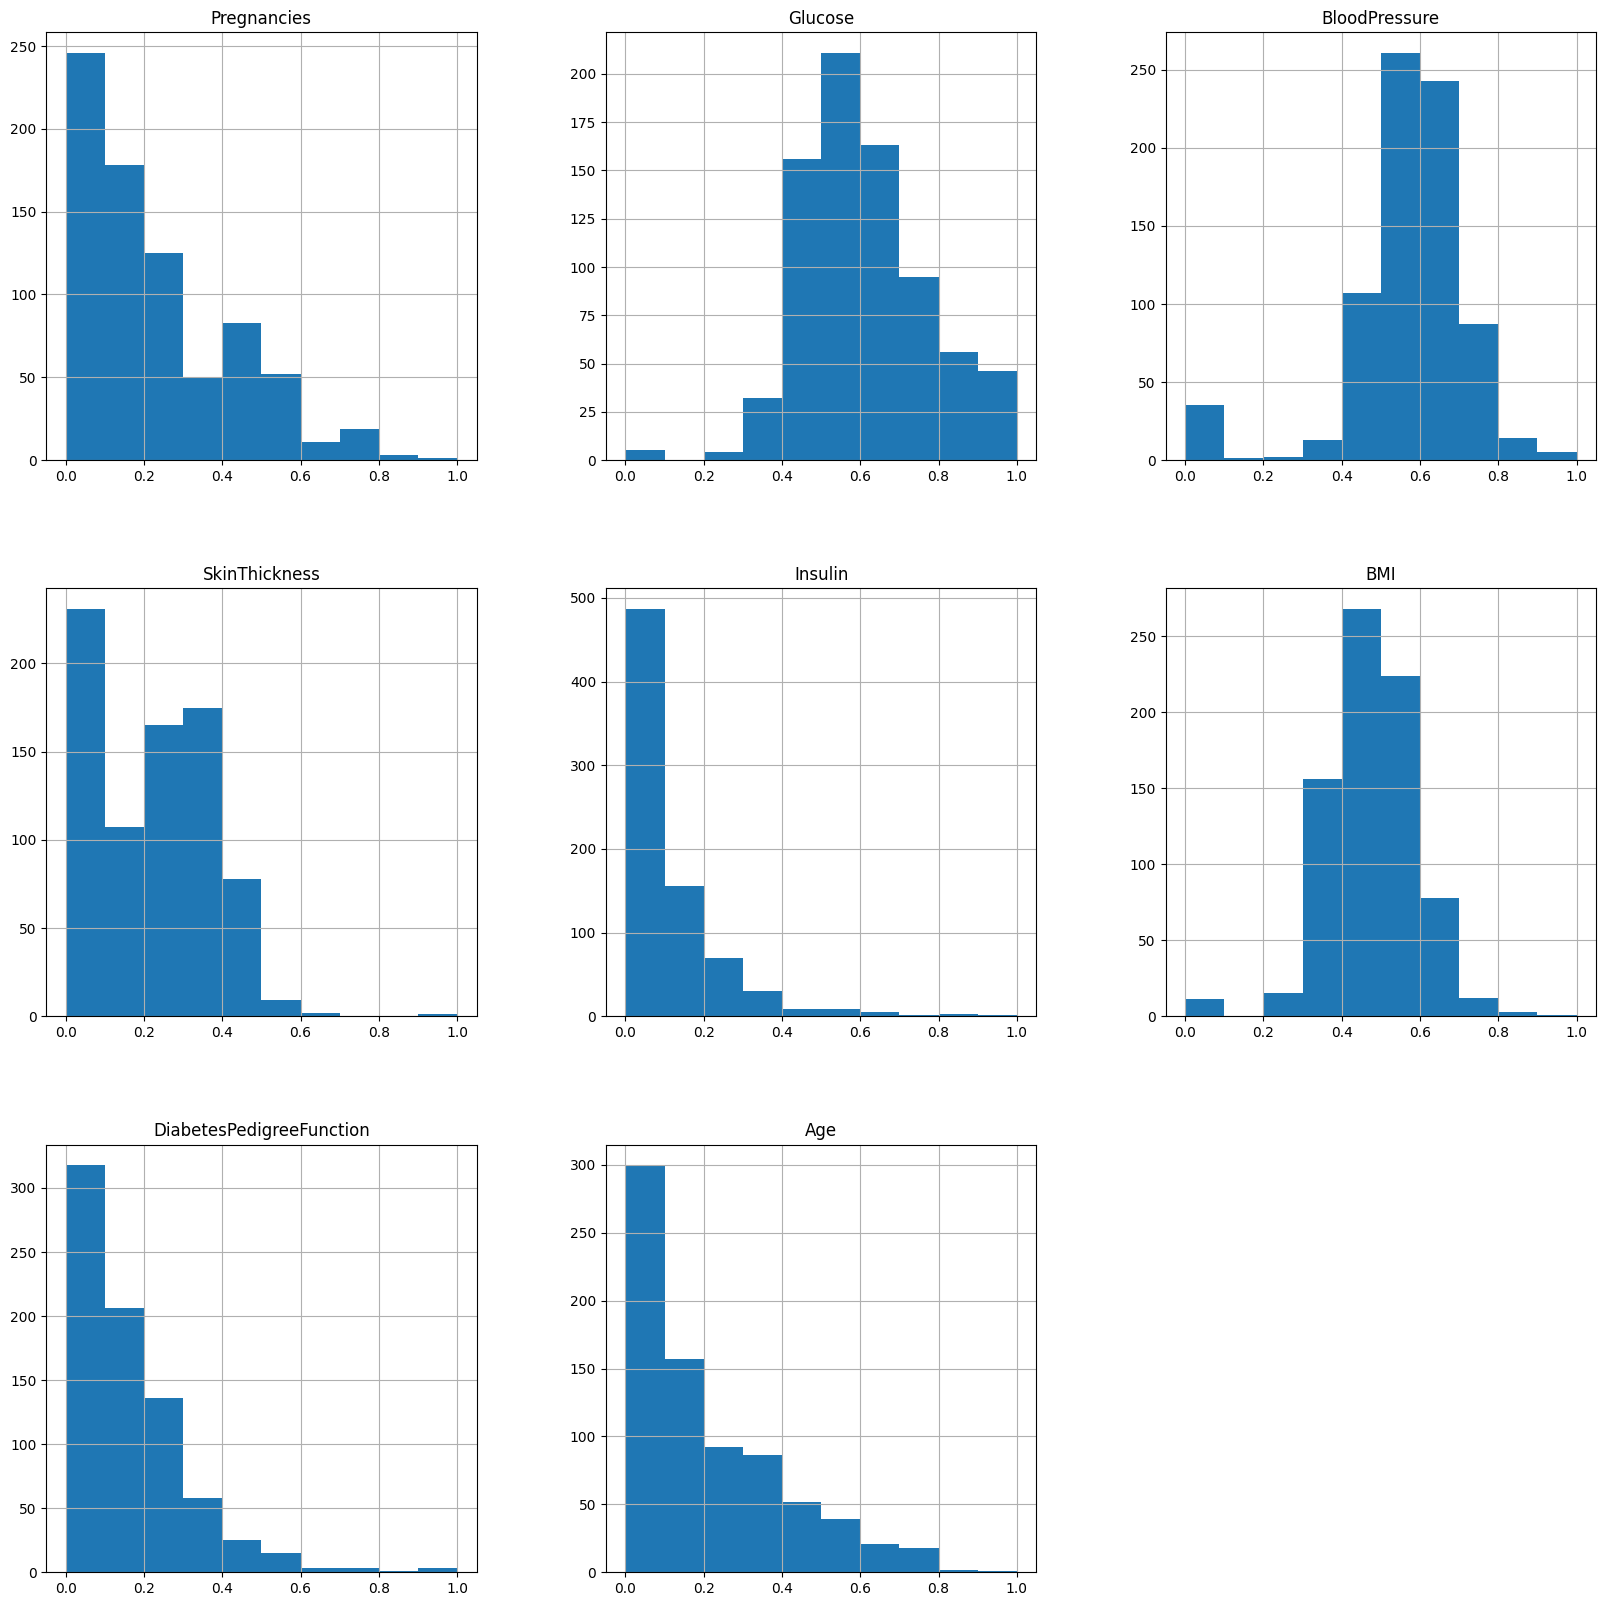

In [ ]:
data.hist(figsize=(20,20));

Setelah dilihat histogram masing-masing fitur, terlihat bahwa terdapat beberapa fitur yang distribusinya masih belum mendekati distribusi normal

### Check Skewness

Skewness adalah derajat ketidaksimetrisan suatu distribusi. Jika kurva frekuensi suatu distribusi memiliki ekor yang lebih memanjang ke kanan (dilihat dari meannya) maka dikatakan menceng kanan (positif) dan jika sebaliknya maka menceng kiri (negatif). Secara perhitungan, skewness adalah momen ketiga terhadap mean. Distribusi normal (dan distribusi simetris lainnya, misalnya distribusi t atau Cauchy) memiliki skewness 0 (nol). <br>

![](https://cdn-images-1.medium.com/max/1600/1*nj-Ch3AUFmkd0JUSOW_bTQ.jpeg)

<br>Terlihat beberapa fitur di atas memiliki nilai skewness yang tinggi sehingga fitur tersebut sangat menyimpang jauh dari distribusi normal

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


## Klasifikasi

In [ ]:
model = GLVQ(
    distance_type="squared-euclidean",
    activation_type="swish",
    activation_params={"beta": 2},
    solver_type="steepest-gradient-descent",
    solver_params={"max_runs": 200, "step_size": 0.01}
)

### Membagi dataset dan proses klasifikasi

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.3, random_state=42)

model.fit(X_train, y_train)

predicted_labels = model.predict(X_test)

print(classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.63      0.60      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



Confusion Matrix:
[[123  28]
 [ 32  48]]


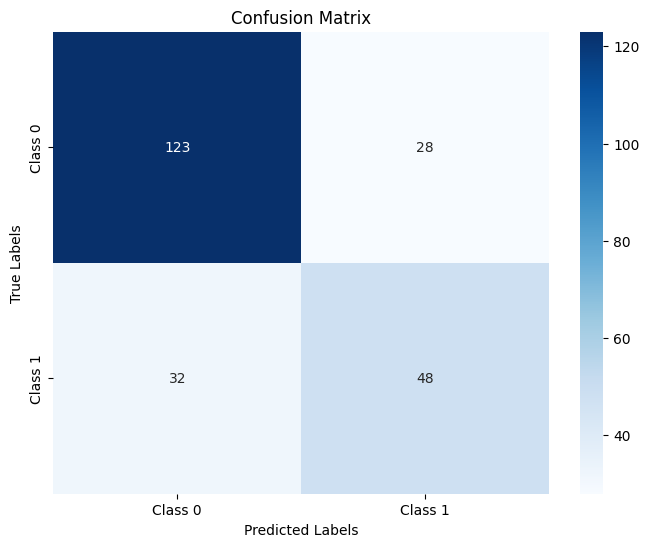

In [ ]:
conf_matrix = confusion_matrix(y_test, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Mengonversi X_test menjadi DataFrame
df_X_test = pd.DataFrame(X_test)
df_X_test["predicted_outcome"] = predicted_labels

# Mengonversi y_test menjadi DataFrame dengan nama kolom yang sesuai
df_y_test = pd.DataFrame(y_test, columns=["Outcome"])

# Menggabungkan X_test dengan y_test berdasarkan indeks
df_X_test = df_X_test.join(df_y_test)

# Memfilter dataframe untuk mendapatkan data yang diprediksi dengan benar
df_correct_predictions = df_X_test[df_X_test["Outcome"] == df_X_test["predicted_outcome"]]

# Memfilter dataframe untuk mendapatkan data yang dikategorikan sebagai 1 oleh model
df_category_1 = df_correct_predictions[df_correct_predictions["predicted_outcome"] == 1]

# Memfilter dataframe untuk mendapatkan data yang dikategorikan sebagai 0 oleh model
df_category_0 = df_correct_predictions[df_correct_predictions["predicted_outcome"] == 0]

# # Menampilkan dataframe yang berisi data yang dikategorikan sebagai 1 oleh model
# print("Data yang dikategorikan sebagai 1 oleh model:")
# df_category_1.head()

# # Menampilkan dataframe yang berisi data yang dikategorikan sebagai 0 oleh model
# print("Data yang dikategorikan sebagai 0 oleh model:")
# df_category_0.head()

In [ ]:
# Drop kolom predicted_outcome
df_category_1 = df_category_1.drop(columns=["Outcome","predicted_outcome"])
df_category_0 = df_category_0.drop(columns=["Outcome","predicted_outcome"])

In [ ]:
# Kembalikan nilai yang sudah dinormalisasi ke skala aslinya
df_category_1_original = scaler.inverse_transform(df_category_1)

# Konversi kembali ke dataframe untuk kemudahan
category_1_original_df = pd.DataFrame(df_category_1_original, columns=df_category_1.columns)

category_1_original_df.median()

Pregnancies                   5.500
Glucose                     158.000
BloodPressure                76.000
SkinThickness                32.500
Insulin                      64.500
BMI                          36.500
DiabetesPedigreeFunction      0.524
Age                          36.500
dtype: float64

In [ ]:
#  Kembalikan nilai yang sudah dinormalisasi ke skala aslinya
df_category_0_original = scaler.inverse_transform(df_category_0)

# Konversi kembali ke dataframe untuk kemudahan
category_0_original_df = pd.DataFrame(df_category_0_original, columns=df_category_0.columns)

category_0_original_df.median()

Pregnancies                   2.000
Glucose                     101.000
BloodPressure                70.000
SkinThickness                20.000
Insulin                      42.000
BMI                          30.100
DiabetesPedigreeFunction      0.324
Age                          26.000
dtype: float64

In [ ]:
# category_1_original_df.median()

In [ ]:
# category_0_original_df.median()

In [ ]:
# Data sintetis

# Pregnancies
# Glucose
# BloodPressure
# SkinThickness
# Insulin
# BMI
# DiabetesPedigreeFunction
# Age

data_sintetis = np.array([
    [6, 98, 58, 33, 190, 34, 0.43, 43],
    [2, 90, 65, 20, 80, 25.0, 0.2, 40],
    [8, 180, 90, 35, 120, 32.0, 0.5, 55],
    [3, 95, 75, 30, 90, 27.0, 0.4, 30],
    [6, 140, 85, 28, 110, 30.0, 0.6, 45]
])

# Melakukan scaling pada data uji
data_sintetis_scaled = scaler.fit_transform(data_sintetis)

# Melakukan prediksi pada data uji yang telah di-scale
predicted_classes = model.predict(data_sintetis_scaled)

# Mencetak hasil prediksi
for i, prediction in enumerate(predicted_classes):
    if prediction == 0:
        print(f"Prediksi kelas untuk data ke-{i+1}: {prediction} (tidak terindikasi diabetes)")
    else:
        print(f"Prediksi kelas untuk data ke-{i+1}: {prediction} (terindikasi diabetes)")

Prediksi kelas untuk data ke-1: 0 (tidak terindikasi diabetes)
Prediksi kelas untuk data ke-2: 0 (tidak terindikasi diabetes)
Prediksi kelas untuk data ke-3: 1 (terindikasi diabetes)
Prediksi kelas untuk data ke-4: 0 (tidak terindikasi diabetes)
Prediksi kelas untuk data ke-5: 1 (terindikasi diabetes)
